# Statistics and Trends Assignment

## Applied Data Science 1

### Module Leader: Dr. William Cooper

## Report by:
- **Name:** Nazmul Hossain
- **Student ID:** 23015862
- **GitHub Repository:** https://github.com/nazmul-nil/statistics-and-trends


## Project overview

This is a project report on Consumer Behavior and Shopping Habits (Zeesolver, 2022). With this dataset we can find answers of what people buy and why. We can get a relationship between people's age and choices of things, purchasing amount, their color choices, subscription status, frequency of purchases and a bunch of other things. 

By analising this data, we can learn why people choose certain things. Whether it's clothes, shoes, or other stuff, this data helps us understand why we make the choices we do when we shop.

## First let's import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Let's read dataframe using pandas 

In [38]:
# Set the Customer ID as the index column
df = pd.read_csv("archive/shopping_trends.csv", index_col = "Customer ID")

# print the first 5 rows(head) and try to get some insight
# df.head()

In [35]:
# Find some basic statistics of the numerical data series from our dataframe
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [37]:
sub_dataframe = df[['Age', 'Purchase Amount (USD)',]]
sub_dataframe.corr(method='pearson')

,Age,Purchase Amount (USD)
Age,1.000000,-0.010424
Purchase Amount (USD),-0.010424,1.000000


**Correlation Coefficient (Pearson):**
   - The correlation coefficient measures the strength and direction of the linear relationship between two variables. (Mukaka, 2012)
   
From the correlation matrix found from our two variables Age and Purchase Amount(USD):


   - For the 'Age' and 'Purchase Amount (USD)' variables, the correlation coefficient is approximately -0.0104.
   - A correlation coefficient close to 0 indicates a weak linear relationship between the variables. (Székely et al., 2007)

   - The negative correlation coefficient suggests a slight negative linear relationship between age and purchase amount. (Mukaka, 2012)
   - However, in our case the correlation is very close to zero. Which indicats that the relationship between age and purchase amount is extremely weak.
   - We can say that, there is very little predictable relationship between a person's age and the amount they spend on purchases.

**Conclusion:**
   -We can draw a conclusion that age does not have a significant impact on the purchase amount based on this correlation analysis.


## Let's build some functions and do some visualisations

In [57]:
def age_purchase_amount_hist(df_age, df_purchase_amount):
    """This function will plot a histogram of purchasing amount of consumers vs their age"""
    
    # Initialize figures with 2 subplots in a single row
    fig, axs = plt.subplots(1, 2)
    
    axs = axs.flatten()
    
    subdata_series = [df_age, df_purchase_amount]
    
    colors = ['green', 'salmon']
    
    xlabels = ['Age', 'Purchase Amount (USD)']
    
    for i, ax in enumerate(axs):
            ax.hist(subdata_series[i], color=colors[i], bins=50)
            
            ax.set_xlabel(xlabels[i])
            ax.set_ylabel('Frequency')
            ax.set_title('Histograms for ' + xlabels[i])
    
    # Adjust spacing between the subplots and set title in the middle
    plt.subplots_adjust(wspace=0.5)
    fig.suptitle('Histograms for Age and Purchase Amount (USD)', fontsize=16, y=1.05)
        
    return

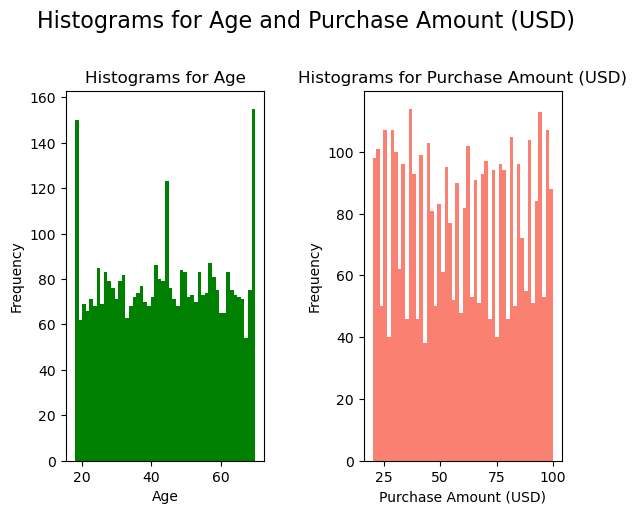

In [58]:
# Make sub data series from the Age and Purchase Amount (USD) columns of our dataframe
df_age = df['Age']
df_purchase_amount = df['Purchase Amount (USD)']

age_purchase_amount_hist(df_age, df_purchase_amount)

In [21]:
# Create a pie chart of Subscription Status

def subscription_counts_pie(subscription_counts):
    """This function will show the number of subscriptions in a pie chart"""
    
    plt.subplots(dpi=144)
    plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title('Pie Chart of Subscription Status')
    plt.show()
    return

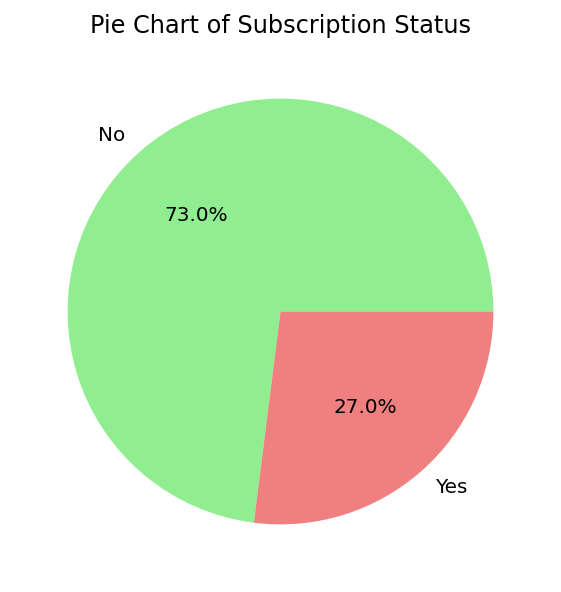

In [22]:
subscription_counts = df['Subscription Status'].value_counts()

subscription_counts_pie(subscription_counts)

In [33]:
def age_vs_purchase_amount_scatter(df_age, df_purchase_amount):
    """This function will plot a scatter plot of purchasing amount of consumers vs their age"""
    fig, ax = plt.subplots()
    
    ax.scatter(df_age, df_purchase_amount)
    ax.set_xlabel('Age')
    ax.set_ylabel('Purchase Amount (USD)')
    ax.set_title('Scatter Plot of Purchase Amount vs Age')
    plt.show()
    return

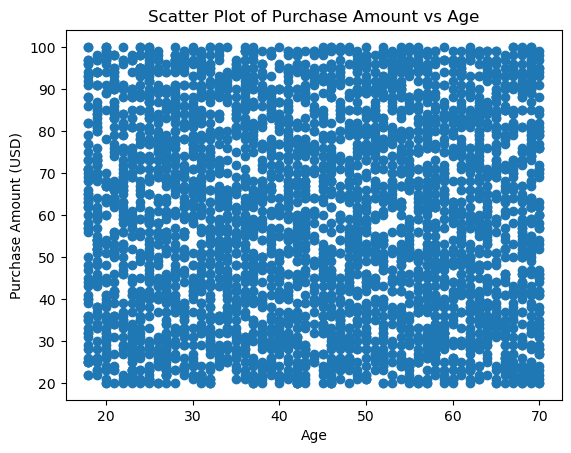

In [34]:
age_vs_purchase_amount_scatter(df_age, df_purchase_amount)

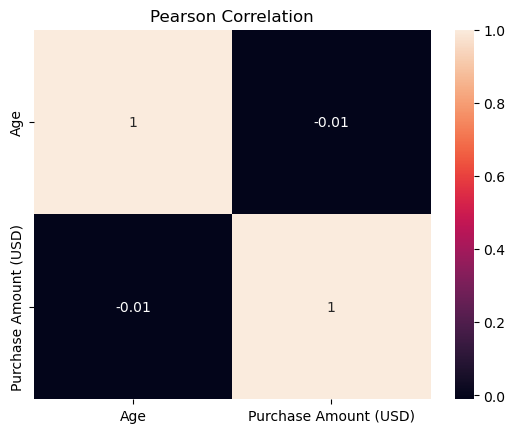

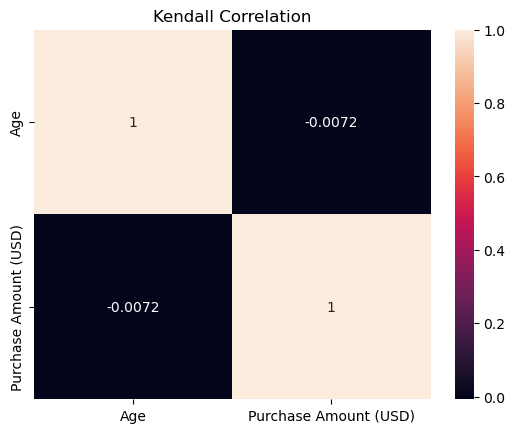

In [68]:

sub_dataframe = df[['Age', 'Purchase Amount (USD)',]]
sub_dataframe.corr(method='pearson')

def age_purchase_corr_heatmap(sub_dataframe, method):
    """This function will draw us a heatmap using seaborn package 
    about correlation between different people of age and their purchasing amount 
    """
        
    # Initialize a figure
    
    fig, ax = plt.subplots()
    
    sns.heatmap(sub_dataframe.corr(method = method), ax = ax, annot=True)
   
    plt.title(method.capitalize() + " Correlation")
        
    plt.show()

    return

age_purchase_corr_heatmap(sub_dataframe, 'pearson')

age_purchase_corr_heatmap(sub_dataframe, 'kendall')

# (Dr. William Cooper, 2024)

### Reference list
Zeesolver. (2022). Consumer Behavior and Shopping Habits Dataset. Kaggle. https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset

Mukaka, M.M., 2012. A guide to appropriate use of correlation coefficient in medical research. Malawi medical journal, 24(3), pp.69-71.

 Székely, G. J. Rizzo; Bakirov, N. K. (2007). "Measuring and testing independence by correlation of distances". Annals of Statistics. 35 (6): 2769–2794. arXiv:0803.4101. doi:10.1214/009053607000000505. S2CID 5661488.
 
 Dr W. Cooper, 2024. "Basic Statistics and Statistical Graphs". https://herts.instructure.com/courses/112173/pages/week-3-lecture-slash-tutorial-notes?module_item_id=3634554